In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modellingcsv/Churn_Modelling.csv


In [2]:
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(1000,factor=.1,noise=.1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


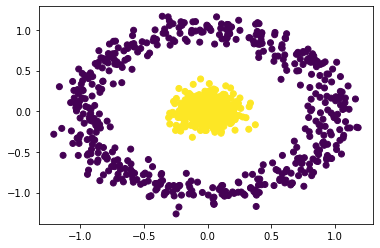

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential()

In [7]:
#architecture
model.add(Dense(3,activation='sigmoid',input_dim=X.shape[1]))
model.add(Dense(3,activation='sigmoid')) 
model.add(Dense(1,activation='sigmoid')) 

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1)

Epoch 1/100
80/80 [==============================] - 0s 858us/step - loss: 0.7013 - accuracy: 0.4900
Epoch 2/100
80/80 [==============================] - 0s 837us/step - loss: 0.6970 - accuracy: 0.4900
Epoch 3/100
80/80 [==============================] - 0s 852us/step - loss: 0.6948 - accuracy: 0.4900
Epoch 4/100
80/80 [==============================] - 0s 869us/step - loss: 0.6940 - accuracy: 0.5138
Epoch 5/100
80/80 [==============================] - 0s 897us/step - loss: 0.6935 - accuracy: 0.4875
Epoch 6/100
80/80 [==============================] - 0s 857us/step - loss: 0.6932 - accuracy: 0.5625
Epoch 7/100
80/80 [==============================] - 0s 853us/step - loss: 0.6934 - accuracy: 0.4500
Epoch 8/100
80/80 [==============================] - 0s 848us/step - loss: 0.6931 - accuracy: 0.4225
Epoch 9/100
80/80 [==============================] - 0s 847us/step - loss: 0.6931 - accuracy: 0.5088
Epoch 10/100
80/80 [==============================] - 0s 831us/step - loss: 0.6930 - accura

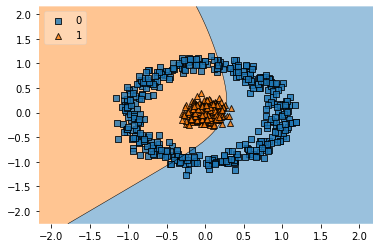

In [11]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train,clf=model,legend=2)

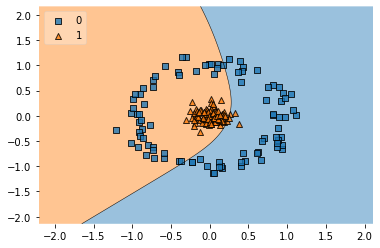

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,y_test,clf=model,legend=2)

In [13]:
y_pred = model.predict(X_test)

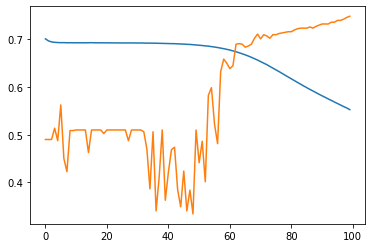

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])